In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [16]:
file_path = 'data/raw/smart_agriculture_dataset.csv'

df = pd.read_csv(file_path)
print("Dataset berhasil dimuat!")
print("-" * 50)

print("INFO DATASET:")
display(df.info())
print("-" * 50)

print("5 BARIS PERTAMA:")
display(df.head())

Dataset berhasil dimuat!
--------------------------------------------------
INFO DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16411 entries, 0 to 16410
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   crop ID         16411 non-null  object 
 1   soil_type       16411 non-null  object 
 2   Seedling Stage  16411 non-null  object 
 3   MOI             16411 non-null  int64  
 4   temp            16411 non-null  int64  
 5   humidity        16411 non-null  float64
 6   result          16411 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 897.6+ KB


None

--------------------------------------------------
5 BARIS PERTAMA:


,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,Wheat,Black Soil,Germination,1,25,80.0,1
1,Wheat,Black Soil,Germination,2,26,77.0,1
2,Wheat,Black Soil,Germination,3,27,74.0,1
3,Wheat,Black Soil,Germination,4,28,71.0,1
4,Wheat,Black Soil,Germination,5,29,68.0,1


In [17]:
import random

df.columns = df.columns.str.lower().str.replace(' ', '_')
print("Nama kolom setelah distandarisasi:")
print(df.columns.tolist())
print("-" * 50)

end_date = pd.Timestamp.today()
start_date = end_date - pd.Timedelta(days=180)

random_dates = [start_date + pd.Timedelta(seconds=random.randint(0, int((end_date - start_date).total_seconds()))) for _ in range(len(df))]
random_dates.sort()
df['timestamp'] = random_dates

cols = ['timestamp'] + [col for col in df.columns if col != 'timestamp']
df = df[cols]

total_records = len(df)
total_cells = df.size

total_missing = df.isnull().sum().sum()
accuracy = 1 - (total_missing / total_cells)

total_non_null = df.notnull().sum().sum()
completeness = total_non_null / total_cells

thirty_days_ago = end_date - pd.Timedelta(days=30)
data_last_30_days = df[df['timestamp'] >= thirty_days_ago].shape[0]
timeliness = data_last_30_days / total_records

print("=== HASIL DATA QUALITY SCORE ===")
print(f"Accuracy     : {accuracy * 100:.2f}%")
print(f"Completeness : {completeness * 100:.2f}%")
print(f"Timeliness   : {timeliness * 100:.2f}% (Jumlah data 30 hari terakhir: {data_last_30_days} baris)")
print("-" * 50)

print("5 BARIS PERTAMA SETELAH DIBERSIHKAN & DITAMBAH TIMESTAMP:")
display(df.head())

Nama kolom setelah distandarisasi:
['crop_id', 'soil_type', 'seedling_stage', 'moi', 'temp', 'humidity', 'result']
--------------------------------------------------
=== HASIL DATA QUALITY SCORE ===
Accuracy     : 100.00%
Completeness : 100.00%
Timeliness   : 16.99% (Jumlah data 30 hari terakhir: 2788 baris)
--------------------------------------------------
5 BARIS PERTAMA SETELAH DIBERSIHKAN & DITAMBAH TIMESTAMP:


,timestamp,crop_id,soil_type,seedling_stage,moi,temp,humidity,result
0,2025-08-30 08:47:23.524359,Wheat,Black Soil,Germination,1,25,80.0,1
1,2025-08-30 08:50:27.524359,Wheat,Black Soil,Germination,2,26,77.0,1
2,2025-08-30 08:57:10.524359,Wheat,Black Soil,Germination,3,27,74.0,1
3,2025-08-30 09:37:58.524359,Wheat,Black Soil,Germination,4,28,71.0,1
4,2025-08-30 09:53:15.524359,Wheat,Black Soil,Germination,5,29,68.0,1


✅ Data bersih berhasil disimpan ke: outputs//cleaned_data.csv
--------------------------------------------------
📊 Menampilkan Distribusi Data Numerik...


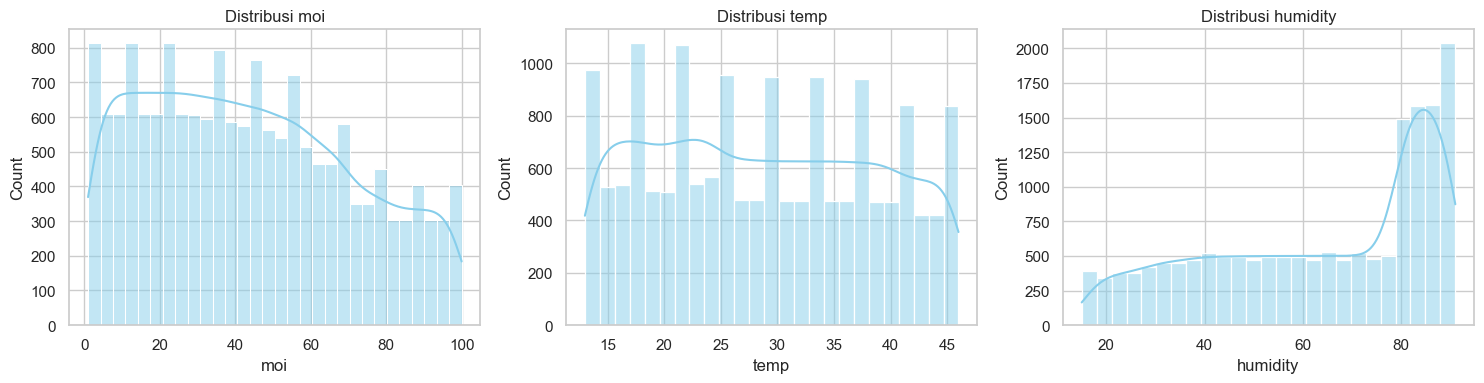

🔥 Menampilkan Korelasi Antar Variabel Numerik...


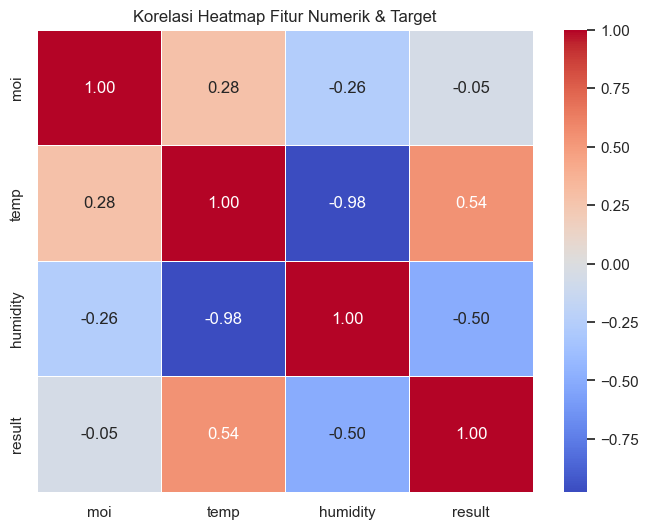

🌱 Menampilkan Proporsi Target (Butuh Irigasi vs Tidak)...


C:\Users\ahnaf\AppData\Local\Temp\ipykernel_14240\2772524952.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='result', palette='Set2')


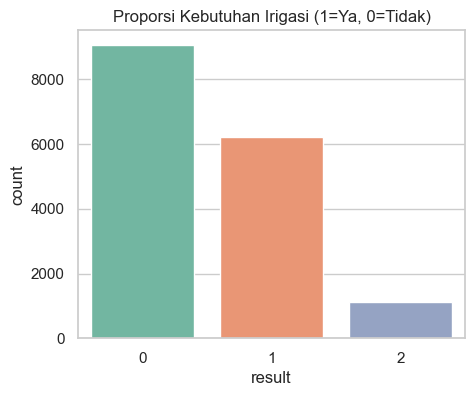

In [19]:
import os

output_dir = 'outputs/'
os.makedirs(output_dir, exist_ok=True) 
clean_data_path = f'{output_dir}/cleaned_data.csv'
df.to_csv(clean_data_path, index=False)
print(f"✅ Data bersih berhasil disimpan ke: {clean_data_path}")
print("-" * 50)

print("📊 Menampilkan Distribusi Data Numerik...")
num_cols = ['moi', 'temp', 'humidity']
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

print("🔥 Menampilkan Korelasi Antar Variabel Numerik...")
plt.figure(figsize=(8, 6))
corr_matrix = df[['moi', 'temp', 'humidity', 'result']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Heatmap Fitur Numerik & Target')
plt.show()

print("🌱 Menampilkan Proporsi Target (Butuh Irigasi vs Tidak)...")
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='result', palette='Set2')
plt.title('Proporsi Kebutuhan Irigasi (1=Ya, 0=Tidak)')
plt.show()